In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [3]:
data=np.array([[3,4],[2,8],[6,9],[10,12]])

In [4]:
data


array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [7]:
df=pd.DataFrame(data,columns=["Math","Bio"])

In [8]:
df

,Math,Bio
0,3,4
1,2,8
2,6,9
3,10,12


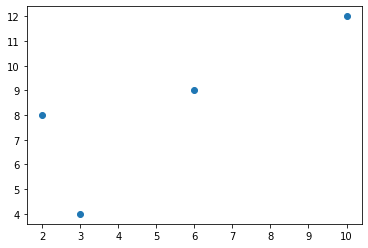

In [9]:
plt.scatter(df["Math"],df["Bio"])

In [ ]:
1. stadarization of the data
2. find cov matrix from the data
3. eig value and eig vector
4. find the principle component

In [12]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [13]:
(3+2+6+10)/4

5.25

In [14]:
(4+8+9+12)/4

8.25

In [10]:
meanbycol=np.mean(data,axis=0)

In [11]:
meanbycol

array([5.25, 8.25])

In [ ]:
data-mean

In [16]:
scaled_data=data-meanbycol

In [17]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [23]:
stdbycol=np.std(data,axis=0)

In [25]:
scaled_data=scaled_data/stdbycol

In [26]:
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [22]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st.fit_transform(df)


array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [27]:
scaled_data.T

array([[-0.7228974 , -1.04418513,  0.2409658 ,  1.52611672],
       [-1.4852969 , -0.08737041,  0.26211122,  1.31055608]])

In [31]:
cov_mat=np.cov(scaled_data.T)